In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.simplefilter(action='ignore')

In [12]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
mush_data = pd.read_csv("mushrooms (1).csv")
mush_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
na_data = pd.read_csv("news_articles (2).csv")
na_data

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


In [8]:
na_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


I'll go ahead and use the credit card data

First we take a look at the data

In [22]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Very nice to see that there are no missing values considering the dataset is quite large.

I'm not entirely sure what the 'step' column really means so I want to do some more analysis of it

In [13]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

According to the dataset notes on Kaggle, the 'step' refers to a unit of time but it isn't entirely clear what this means, as 1 step is 1 hour, but it goes up to 743. I will consider taking it out later on.

How many of each different 'type' are there?

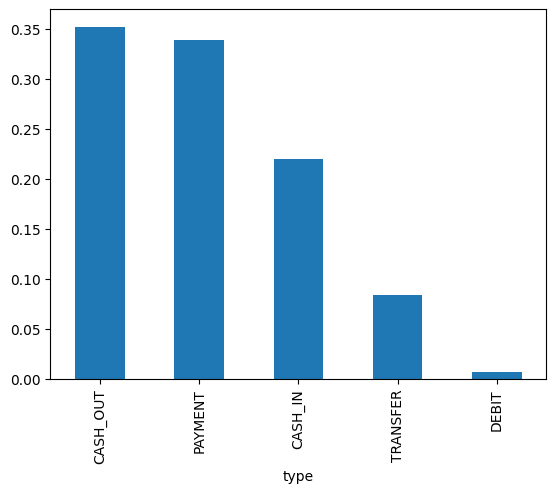

In [15]:
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Majority of the different types are cash out, closely followed by payments.

There are over 6 million entries, but in order to make sure the data is nicely representative, we need to see how ditributed the two outcomes are.

In [16]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

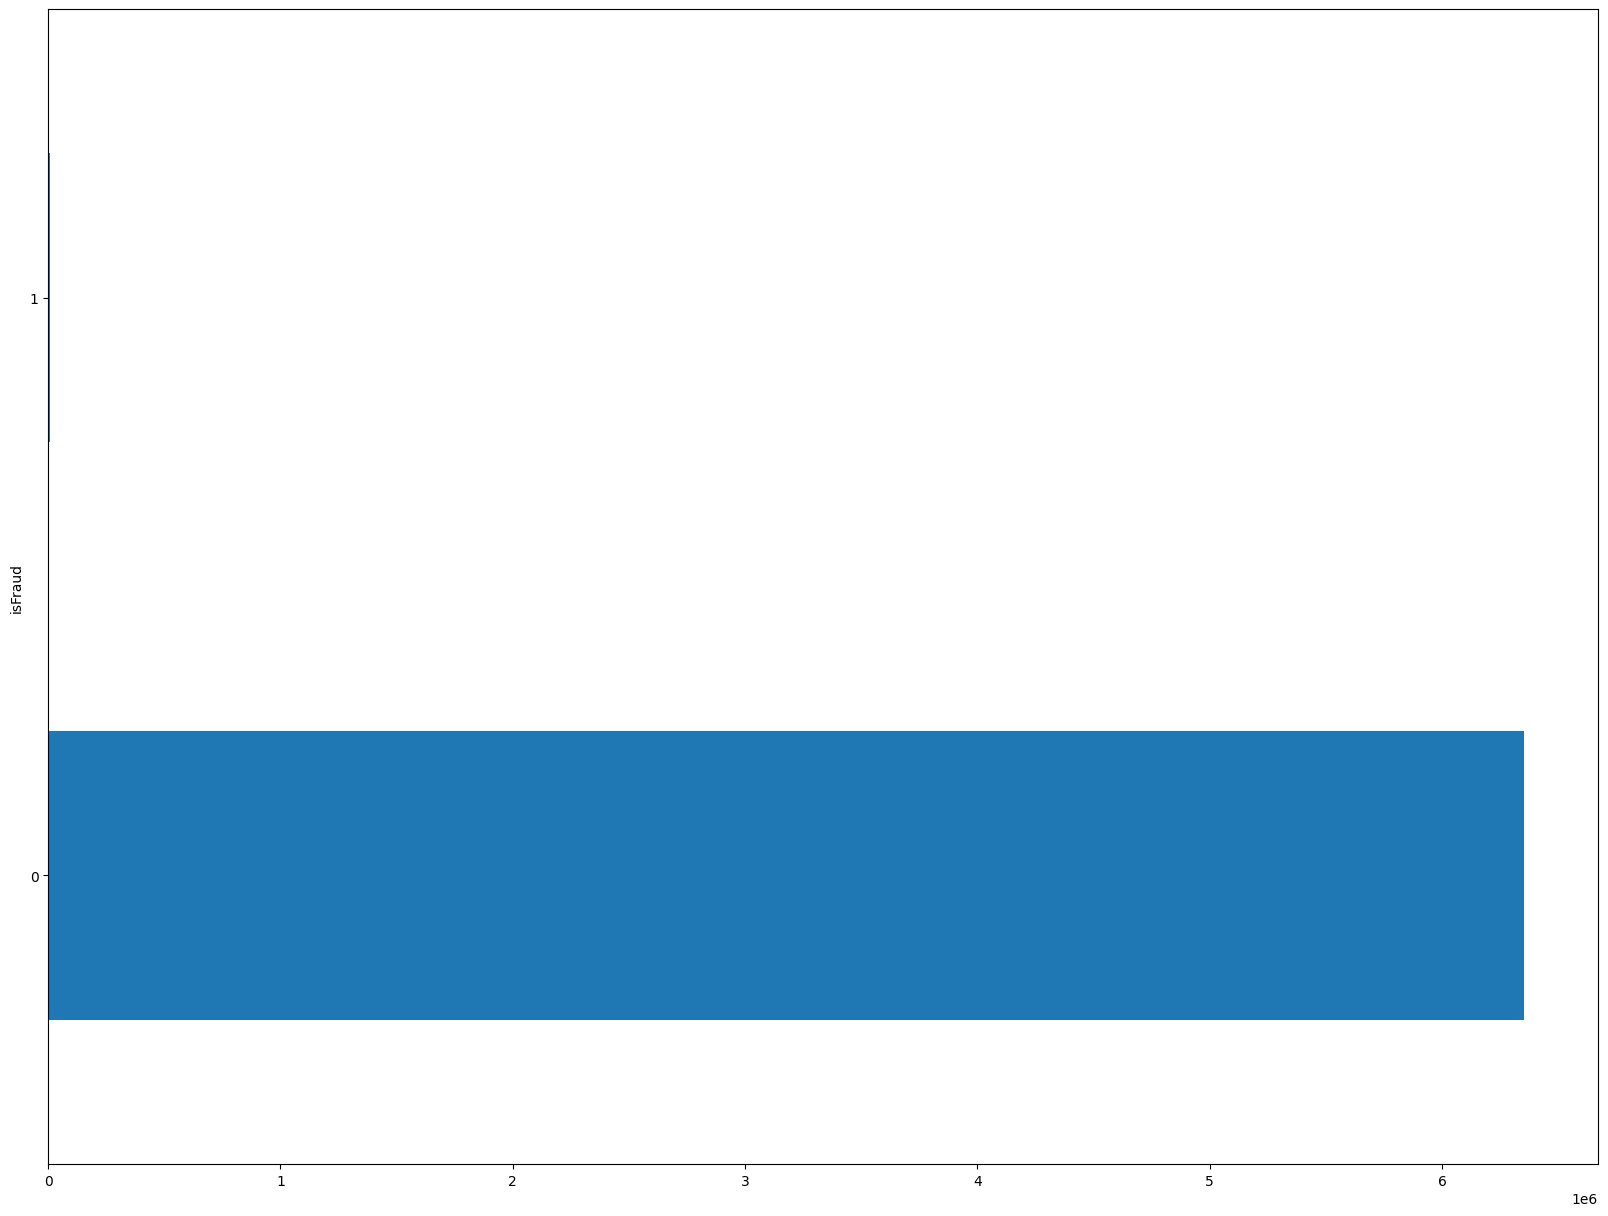

In [21]:
plt.figure(figsize=(20,15))
df['isFraud'].value_counts().plot(kind='barh')
plt.show()

As we can see the fraudulent entries are very very small in comparison, so this will need to be changed when we get to the modelling.

In [23]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

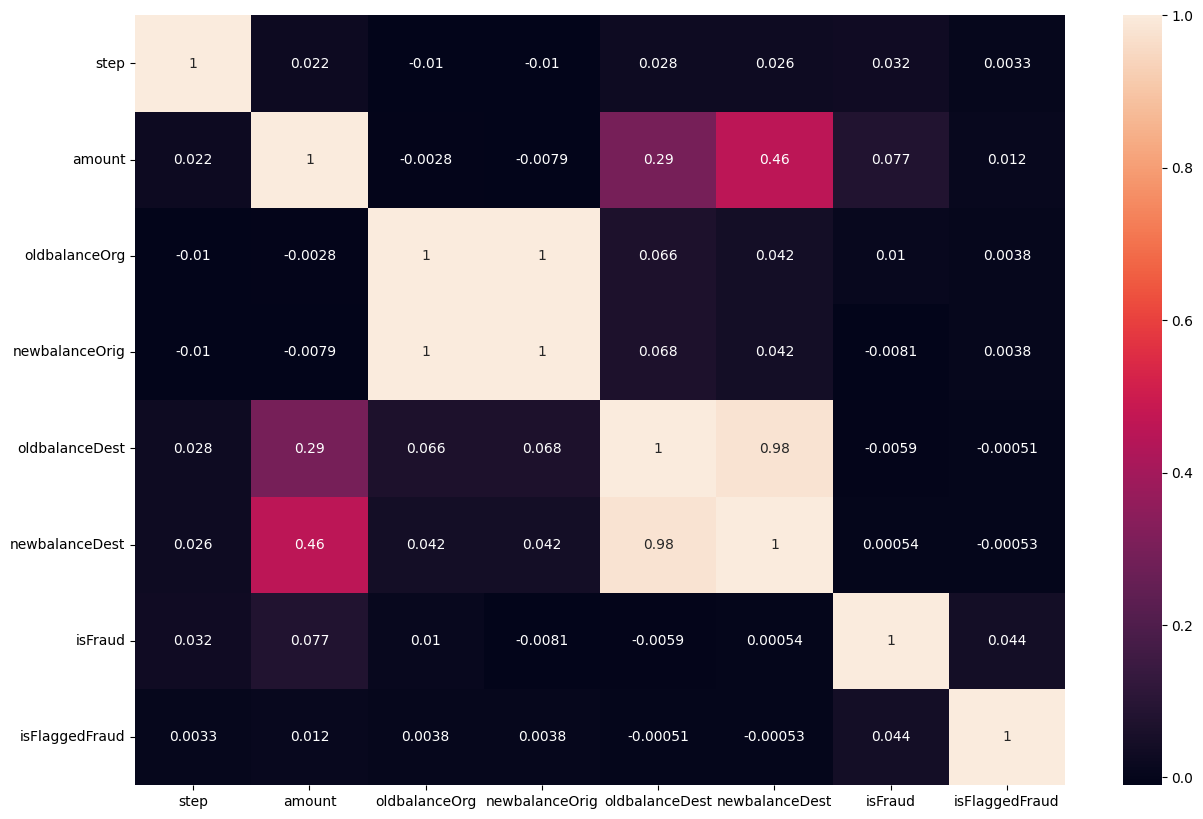

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True)

There are very strong correlations in the places where they are expected to be. For example it would be silly for the old and new balances to not follow each other as far as changes between them go. However besides these, there aren't any notable correlations between any of the other variables.

There isn't much to unpack and analyse with this dataset, so I will be going into the model side of the preprocessing.

I don't need some of these columns, so I will drop them.

In [28]:
df.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1, inplace = True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


I also need to make sure all the data is in numerical form.

In [30]:
dfnew = pd.get_dummies(data = df, columns = ['type'])
dfnew.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


Cash in is not very useful in determining fraud so I will be dropping that column too

In [31]:
dfnew.drop(['type_CASH_IN'], axis=1, inplace=True)
dfnew

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,True


As for the step column, I will leave it in for now potentially remove it later.

And now for the scaling of the data. I will be using standard first, and robust separately afterwards 

In [32]:
sscaler = preprocessing.StandardScaler()
rscaler = preprocessing.RobustScaler()

In [34]:
nonfraud = dfnew[dfnew['isFraud']==0]
fraud = dfnew[dfnew['isFraud']==1]
nonfraud = nonfraud.sample(n=10000, random_state = 32)

frauddata = pd.merge(fraud,nonfraud, how = "outer")
frauddata

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.00,181.00,0.00,0.00,0.00,1,False,False,False,True
1,1,181.00,181.00,0.00,21182.00,0.00,1,True,False,False,False
2,1,2806.00,2806.00,0.00,0.00,0.00,1,False,False,False,True
3,1,2806.00,2806.00,0.00,26202.00,0.00,1,True,False,False,False
4,1,20128.00,20128.00,0.00,0.00,0.00,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
18208,95,7949.63,100871.00,92921.37,0.00,0.00,0,False,False,True,False
18209,139,93507.36,17686339.55,17779846.91,519706.15,426198.79,0,False,False,False,False
18210,282,5842.85,91945.00,86102.15,0.00,0.00,0,False,False,True,False
18211,567,5307.36,6149.43,842.06,0.00,0.00,0,False,False,True,False


In [35]:
x = frauddata.drop('isFraud', axis=1)
y = frauddata['isFraud']

In [37]:
## split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [38]:
x_train = sscaler.fit_transform(x_train)
x_test = sscaler.transform(x_test)

In [48]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_lr = logreg.predict(x_test)
print(classification_report(y_test, y_pred_lr))
acc_logreg = accuracy_score(y_test, y_pred_lr)*100

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3009
           1       0.93      0.91      0.92      2455

    accuracy                           0.93      5464
   macro avg       0.93      0.93      0.93      5464
weighted avg       0.93      0.93      0.93      5464



In [49]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred_gnb = gaussian.predict(x_test)
print(classification_report(y_test, y_pred_gnb))
acc_gnb = accuracy_score(y_test, y_pred_gnb)*100

              precision    recall  f1-score   support

           0       1.00      0.36      0.53      3009
           1       0.56      1.00      0.72      2455

    accuracy                           0.65      5464
   macro avg       0.78      0.68      0.62      5464
weighted avg       0.80      0.65      0.61      5464



In [50]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
y_pred_knn = knn.predict(x_test)  
print(classification_report(y_test, y_pred_knn))
acc_knn = accuracy_score(y_test, y_pred_knn)*100

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3009
           1       0.94      0.93      0.94      2455

    accuracy                           0.94      5464
   macro avg       0.94      0.94      0.94      5464
weighted avg       0.94      0.94      0.94      5464



In [51]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred_dt = decision_tree.predict(x_test)  
print(classification_report(y_test, y_pred_dt))
acc_dt = accuracy_score(y_test, y_pred_dt)*100

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3009
           1       0.98      0.99      0.99      2455

    accuracy                           0.99      5464
   macro avg       0.99      0.99      0.99      5464
weighted avg       0.99      0.99      0.99      5464



In [52]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print(classification_report(y_test, y_pred_svm))
acc_svm = accuracy_score(y_test, y_pred_svm)*100

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3009
           1       0.95      0.86      0.90      2455

    accuracy                           0.92      5464
   macro avg       0.92      0.91      0.91      5464
weighted avg       0.92      0.92      0.92      5464



In [53]:
final_scores = {
    'methods': ['Logistic Regression', 'k-Nearest Neighbor','Decision Tree', 'SVM', 'Gaussian NB'],
    'scores': [acc_logreg, acc_knn, acc_dt, acc_svm, acc_gnb]
}

final_scores1 = {
    'methods': ['LReg', 'kNN','D. T.', 'SVM', 'NB'],
    'scores': [acc_logreg, acc_knn, acc_dt, acc_svm, acc_gnb]
}

df1 = pd.DataFrame(final_scores1)

dfscores = pd.DataFrame(final_scores)
dfscores

,methods,scores
0,Logistic Regression,92.917277
1,k-Nearest Neighbor,94.454612
2,Decision Tree,98.993411
3,SVM,91.617862
4,Gaussian NB,64.568082


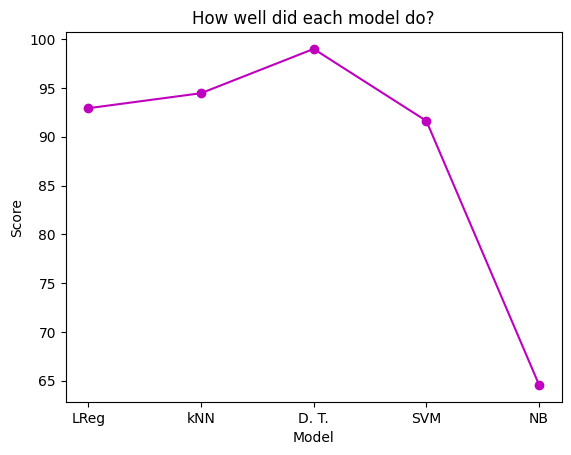

In [54]:
plt.plot(df1['methods'], df1['scores'], 'o-m')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('How well did each model do?')
plt.show()